https://blog.naver.com/nonamed0000/220908890568

In [26]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

### 두 개이하 집단 비교, 독립변수 1개

### 한 집단 평균 vs 특정 기준값 검정: stats.ttest_1samp(sample, k)

#### two_tailed test

    $ H_0 : $ 한 집단 평균 = 특정기준값

    $ H_1 : $ 한 집단 평균 ≠ 특정기준값

#### one_tailed test 

    $ H_0 : $ A그룹 평균 = B그룹 평균

    $ H_1 : $ A그룹 평균 > B그룹 평균

    stats.ttest_ind(dfA, dfB, alternative = 'greater')   대립가설 > 이면 greater 



    $ H_0 : $ A그룹 평균 = B그룹 평균

    $ H_1 : $ A그룹 평균 < B그룹 평균

    stats.ttest_ind(dfA, dfB, alternative = 'less')   대립가설 < 이면 less


In [7]:
one_sample = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
print(np.mean(one_sample))   # 177.96
result = stats.ttest_1samp(one_sample, 175.6)
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result))

177.96
t검정 통계량 = 2.037, pvalue = 0.072


### 두 집단 평균 검정: stats.ttest_ind(x, y)


In [8]:
female = [63.8, 56.4, 55.2, 58.5, 64.0, 51.6, 54.6, 71.0]
male = [75.5, 83.9, 75.7, 72.5, 56.2, 73.4, 67.7, 87.9]
result = stats.ttest_ind(male, female)

print("t검정 통계량: %.3f, pvalue=%.3f"%(result))

t검정 통계량: 3.588, pvalue=0.003


### 한 집단 전후 검정: stats.ttest_rel ( after, before )

In [11]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]
paired_sample = stats.ttest_rel(baseline, follow_up)

print('t검정 통계량 = %.3f, pvalue = %.3f'%(paired_sample))

t검정 통계량 = 3.668, pvalue = 0.006


### 관측치와 기대치 차이 검정 : stats.chisquare(df1, df2)

In [12]:
data1 = [4,6,17,16,8,9]        # 관측치
data2 = [10,10,10,10,10,10]    # 기대치
chis = stats.chisquare(data1, data2)
print("statistic = %.3f, pvalue = %.3f %(chis)")

statistic = %.3f, pvalue = %.3f %(chis)


https://jofresh.tistory.com/70

### 분할표 검정(두 범주형 변수 관련성): stats.chi2_contingency(obs, correction = False)

H0: 두 변수 간 관련성이 없음

H1: 두 변수 간 관련성이 있음

https://ruo.oopy.io/588c37f4-8634-4fcf-b7ba-e53bdfa75970

### 등분산검정: stats.f_oneway ( df1, df2 )

$ H_0 : \sigma_1 = \sigma_2 $

$ H_1 : \sigma_1 ≠ \sigma_2 $

In [25]:
s1 = [46,47,58,47,27,58,56,26,47,25]
s2 = [78,57,31,28,67,77,36,57,36,57]
stats.f_oneway(s1, s2)

F_onewayResult(statistic=1.4591624718860445, pvalue=0.24269553293319623)

### 세 개 이상 집단 비교: ANOVA 
- 정규성, 등분산성, 독립성 충족 전제
- 그룹 간 분산이 클수록, 그룹 내 분산이 작을수록 >>> 그룹간 평균의 차이가 분명해짐

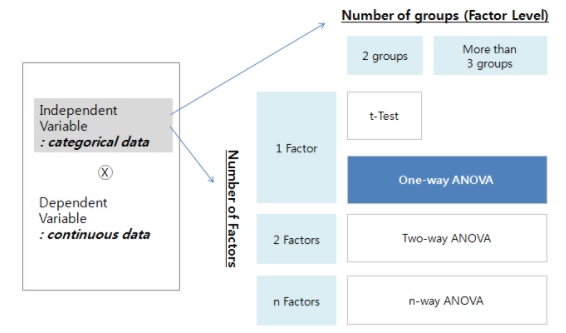

In [27]:
Image('Data/230620/1.png')

### One-way ANOVA: 독립변인 1개, 종속변인 1개, 집단 간 차이 검정
### stats.f_oneway()

    $ H_0 : \mu_1 = \mu_2 = \mu_3 $

    $ H_1 : not  H_0  $ (적어도 한 그룹의 모평균은 다름)

    ex) 한중일 간 수학 성적비교

### Two-way ANOVA: 범주형 독립변수 2개, 연속형 종속변수 1개, 집단 간 차이 검정
### stats.f_oneway()

$ H_{01} $ : 성별에 따른 체중은 동일하다

$ H_{02} $ : 운동량에 따른 체중은 동일하다

$ H_{03} $ : 성별과 운동량은 서로 독립니다

$ H_1 : not  H_0 $

#### -----------------------------------------------------------------------------------------------------------------------------------

### 신뢰구간: stats.t.interval

$ CI = \bar{x} ± t * \frac{s}{\sqrt(n)} $

- n이 작으면 CI이 넓어지고
- n이 커지면 CI가 좁아짐

In [15]:
sample1 = [5, 10, 17, 29, 14, 25, 16, 13, 9, 17]
sample2 = [21, 22, 27, 19, 23, 24, 20, 26, 25, 23]

df = len(sample1) - 1 # 자유도 : 샘플 개수 - 1
mu = np.mean(sample1) # 표본 평균
se = stats.sem(sample1) # 표준 오차

# 95% 신뢰구간
r95 = stats.t.interval(0.95, df, mu, se) # (10.338733110887336, 20.661266889112664)

# 99% 신뢰구간
r99 = stats.t.interval(0.99, df, mu, se) # (8.085277068873378, 22.914722931126622)

print(f'95% 신뢰구간: {r95}')
print(f'99% 신뢰구간: {r99}')

95% 신뢰구간: (10.338733110887336, 20.661266889112664)
99% 신뢰구간: (8.085277068873378, 22.914722931126622)


https://freshrimpsushi.github.io/posts/how-different-between-sample-standard-deviation-and-standard-error/

#### 표준편차
    - 모집단의 분포가 얼마나 퍼져있는가
    - 표준편차는 값의 크기에 따라 좋고 나쁨이 없음
    - 표준편차는 데이터끼리 얼마나 다른지를 봄

#### 표준오차: 통계량의 표준편차
$ SEM = \frac{\sigma}{\sqrt(n)} $
    
    - 표본평균의 표준편차 SEM (Standard Error of Mean)       
        - 평균의 추정치에 대한 불확실도를 수치화
        - 모집단에 대해서는 딱히 어떤 정보도 주지 않는다
        - 표본에 대해서만 논함. (모표준오차는 없음)
        - 주로 가설검정, 신뢰구간, 예측구간 구할 때 필요
        - 표준오차는 작을수록 좋음
        - 표준오차는 표본평균이 얼마나 틀렸는지 봄
        - 전체 표본보다 표본평균이 모평균에 모여있을 것 (표준편차보다 값이 항상 작음)

#### 표본오차 = 오차한계 = 최대허용오차 = 오차범위 = 표집오차
    표본오차 = 표준오차 * 임계값
$ z_(critacal) * \frac{\sigma}{\sqrt(n)} $

https://recipesds.tistory.com/entry/%ED%91%9C%EB%B3%B8%ED%8E%B8%EC%B0%A8%EC%99%80-%ED%91%9C%EC%A4%80%EC%98%A4%EC%B0%A8-%EA%B0%9C%EB%85%90-%EA%B7%B8%EB%A6%AC%EA%B3%A0-%ED%91%9C%EB%B3%B8%EC%98%A4%EC%B0%A8-%EC%98%A4%EC%B0%A8%ED%95%9C%EA%B3%84%EC%99%80-%EC%98%A4%EC%B0%A8%EB%B2%94%EC%9C%84%E2%80%A6-%EC%84%A0%EA%B1%B0%EA%B8%B0%EC%82%AC%EB%A5%BC-%EC%9D%BD%EB%8A%94-%EC%9C%A0%EC%8B%9D%ED%95%A8

<Axes: ylabel='Density'>

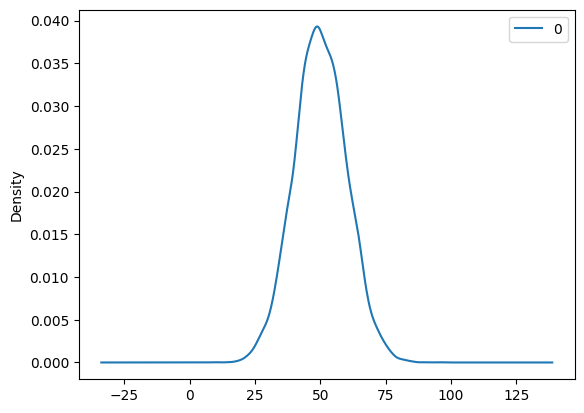

In [19]:
pop = np.random.normal(50, 10, 10000)
pd.DataFrame(pop).plot(kind = 'kde')

In [20]:
# 샘플링: np.random.choice(data, 뽑을 횟수)

sampling_n = [5,10,20,50,100,500,1000]  # 샘플링 횟수
samples = []

# 샘플링
for i in sampling_n:
    sample = np.random.choice(pop, i)
    samples.append(sample)
    
samples

[array([52.19014297, 45.11773056, 62.13027541, 59.03605962, 47.91051024]),
 array([53.01562331, 35.2986064 , 44.03495314, 55.07468279, 54.2210393 ,
        42.91698635, 57.08007943, 56.93627645, 53.33929336, 46.96781584]),
 array([54.49978551, 69.57545268, 49.51894186, 70.04500654, 52.76700366,
        57.01711171, 66.10437787, 41.28141936, 53.78513142, 48.70103288,
        45.56504108, 39.72088691, 50.41421057, 52.6384131 , 41.99925126,
        49.53799681, 48.3144081 , 47.09022027, 51.23541978, 62.27496984]),
 array([53.164627  , 69.7186243 , 44.47468094, 51.21322099, 46.58759225,
        35.26536324, 39.33999431, 47.4725432 , 46.57551606, 34.61825215,
        64.29125046, 52.42441912, 43.12155676, 59.48168007, 32.38793926,
        38.92269895, 47.3098365 , 56.15311725, 35.38371785, 44.09862346,
        50.57851239, 60.82235091, 54.45399928, 51.77189382, 62.11114085,
        37.32873882, 50.57851239, 32.49797279, 35.86889543, 51.48563151,
        56.76754848, 65.17359904, 52.36300606

n:  5 
mean:  53.27694376177622 
std:  7.212860068491729 
std_err:  3.2256890850682587
44.32099509064848 62.23289243290395


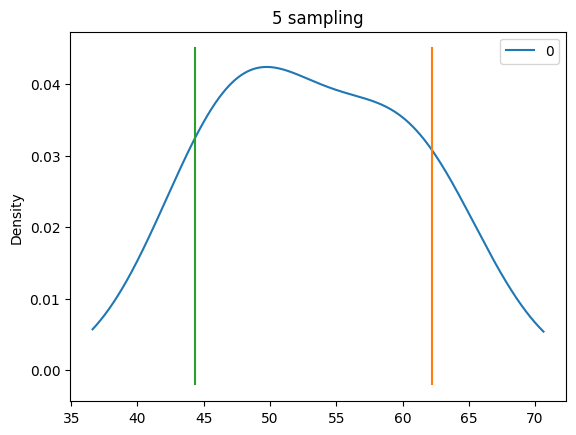

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  10 
mean:  49.8885356384967 
std:  7.249564246350905 
std_err:  2.292513506219088
44.702509789722725 55.07456148727067


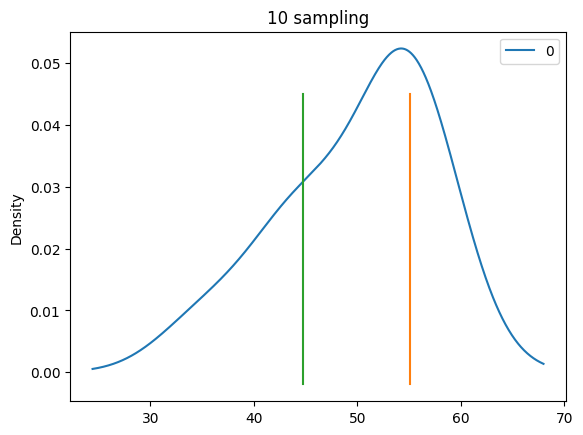

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  20 
mean:  52.604304059595435 
std:  8.700586481491593 
std_err:  1.9455102816730916
48.53230424195506 56.67630387723581


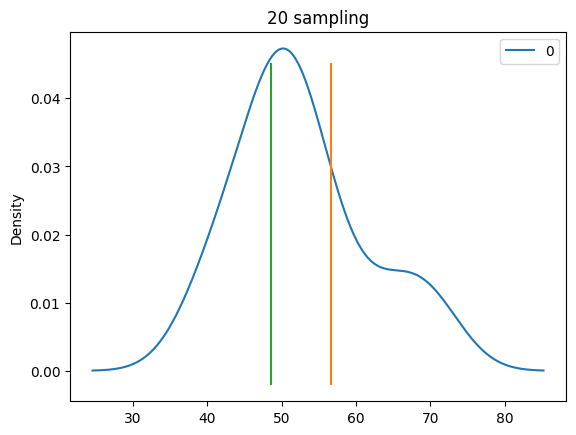

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  50 
mean:  48.399827548631954 
std:  9.028836727302663 
std_err:  1.2768703352203734
45.833860545319155 50.965794551944754


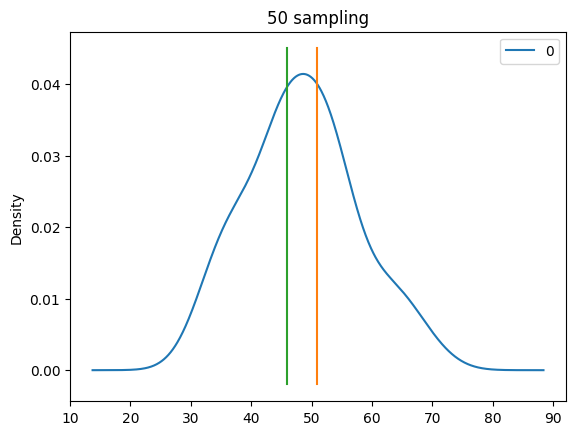

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  100 
mean:  50.883404520207215 
std:  10.255175373287846 
std_err:  1.0255175373287846
48.84855523857 52.91825380184443


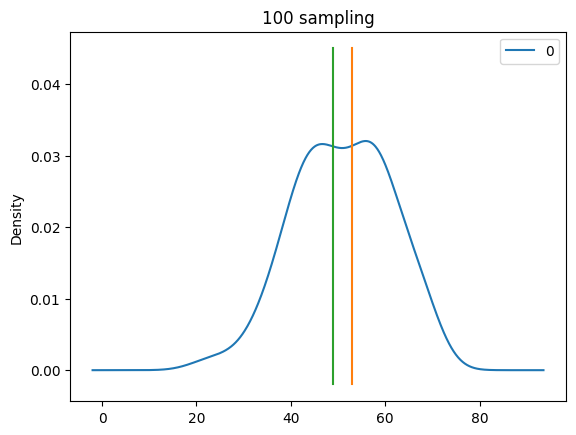

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  500 
mean:  49.563493124718285 
std:  9.798446976458058 
std_err:  0.43819987026574997
48.702548960480186 50.42443728895638


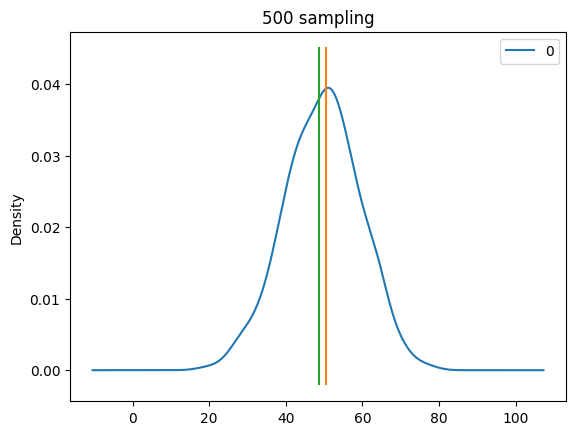

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

n:  1000 
mean:  50.40336788849441 
std:  9.699665693125686 
std_err:  0.30673036132472997
49.801458183078445 51.00527759391037


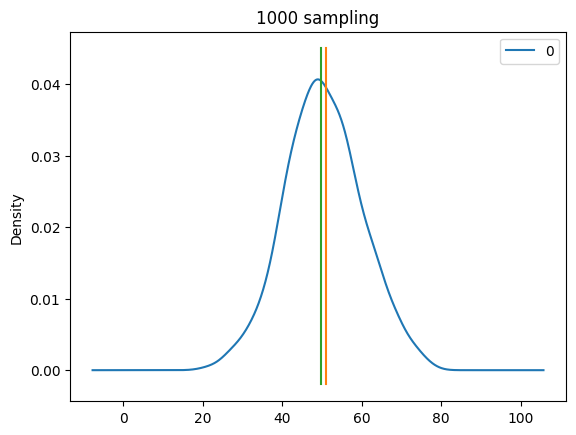

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-



In [24]:
# 각 샘플의 신뢰구간
# >>>>>> 샘플 사이즈가 작으면 신뢰구간이 넓어지고, 샘플사이즈가 커지면 신뢰구간이 좁아짐

for i, sample in enumerate(samples):
    n = len(sample) # 각 샘플의 사이즈
    dof = n-1       # 자유도
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)     # 표본 표준편차
    sample_std_err = sample_std / np.sqrt(n)  # 표본 표준오차 (표본평균의 표준편차)
    print('n: ', n, '\nmean: ', sample_mean, '\nstd: ', sample_std, '\nstd_err: ', sample_std_err)
    
    # 신뢰구간: stats.t.interval()
    CI_min, CI_max = stats.t.interval(.95, dof, loc=sample_mean, scale=sample_std_err)
    print(CI_min, CI_max)
    
    # 시각화
    ax = pd.DataFrame(sample).plot(kind ='kde')
    ax.plot([CI_max, CI_max], [-0.002, 0.045])
    ax.plot([CI_min, CI_min], [-0.002, 0.045])
    plt.title("{} sampling".format(sampling_n[i]))
    plt.show()
    print("-*-"*20)
    print()

##### ---------------------------------------------------------------------------------------------

In [28]:
nonsmokers = [18, 22, 21, 17, 20, 17, 23, 20, 22, 21]
smokers = [16, 20, 14, 21, 20, 18, 13, 15, 17, 21]

# 정규성검정 : 샤피로 윌크 normality test
normal1 = stats.shapiro(nonsmokers)
normal2 = stats.shapiro(smokers)
normal1, normal2

(ShapiroResult(statistic=0.9119929671287537, pvalue=0.29496321082115173),
 ShapiroResult(statistic=0.9194088578224182, pvalue=0.35205063223838806))

In [29]:
# 등분산성 : Levene

stats.levene(nonsmokers, smokers)

LeveneResult(statistic=1.945945945945946, pvalue=0.180000749634983)

In [30]:
# 등분산성 : bartlett test

stats.bartlett(nonsmokers, smokers)

BartlettResult(statistic=0.8904487989220573, pvalue=0.3453557166446204)